In [148]:
import numpy as np
import os
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score,confusion_matrix, ConfusionMatrixDisplay, \
classification_report,roc_curve, auc,precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
#plot_roc_curve,

In [13]:
data = pd.read_csv("Fuel_Consumption_2000-2022.csv")
data.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [16]:
data = data.drop(\
                 labels=[x for x in range(len(data)) \
                         if not(data["FUEL"].iloc[x]=="X" or data["FUEL"].iloc[x]=="Z")], axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21138 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              21138 non-null  int64  
 1   MAKE              21138 non-null  object 
 2   MODEL             21138 non-null  object 
 3   VEHICLE CLASS     21138 non-null  object 
 4   ENGINE SIZE       21138 non-null  float64
 5   CYLINDERS         21138 non-null  int64  
 6   TRANSMISSION      21138 non-null  object 
 7   FUEL              21138 non-null  object 
 8   FUEL CONSUMPTION  21138 non-null  float64
 9   HWY (L/100 km)    21138 non-null  float64
 10  COMB (L/100 km)   21138 non-null  float64
 11  COMB (mpg)        21138 non-null  int64  
 12  EMISSIONS         21138 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.3+ MB


In [17]:
data["FUEL"].value_counts() # to check just containing X and Y

X    11822
Z     9316
Name: FUEL, dtype: int64

- We have: $CO_2$ Emissions form a gallon of gasoline = 8,887 grams $CO_2$/ gallon
- The average gasoline vehicle on the road today has a fuel economy of about 22.0 miles per gallon $\approx 35.4$ km per gallon
- Therefore, the average vehicle when driving one mile has tailpipe CO2 emissions of about:
$$CO_2 \text{ emissions per km} = \frac{CO_2 \text{ per gallon}}{MPG}=\frac{8,887}{35.4}=251 \text{ grams}$$

In [18]:
data['EMISSIONS']= data['EMISSIONS'].apply ( lambda x : 1 if x>251 else 0)
data.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,1
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,0


In [19]:
data.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,21138.000000,21138.000000,21138.000000,21138.000000,21138.000000,21138.00000,21138.000000,21138.000000
mean,2011.495222,3.312300,5.808071,12.456893,8.709556,10.77145,27.782997,0.429227
std,6.361156,1.326248,1.829258,3.138024,1.994534,2.58129,7.072271,0.494978
min,2000.000000,0.900000,2.000000,3.500000,3.200000,3.60000,11.000000,0.000000
25%,2006.000000,2.200000,4.000000,10.300000,7.300000,9.00000,23.000000,0.000000
50%,2012.000000,3.000000,6.000000,12.200000,8.300000,10.40000,27.000000,0.000000
75%,2017.000000,4.000000,6.000000,14.300000,10.000000,12.40000,31.000000,1.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.10000,78.000000,1.000000


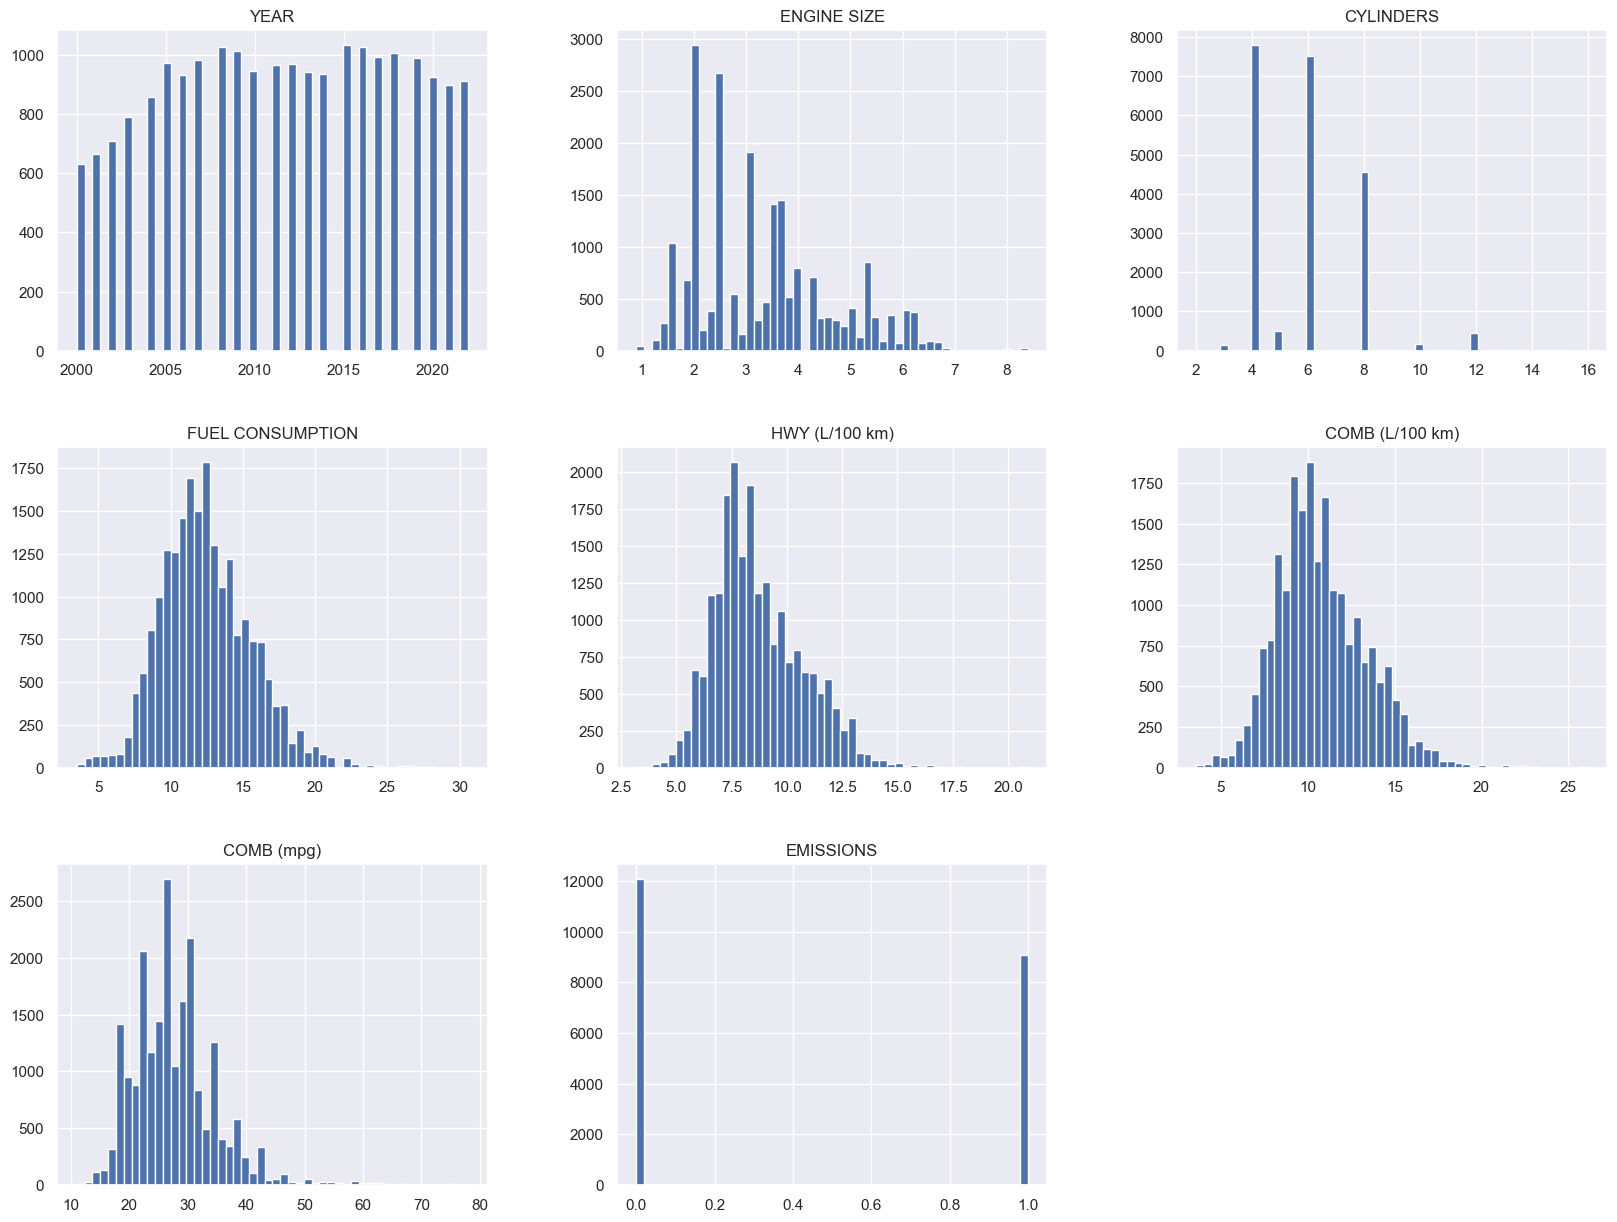

In [122]:
data.hist(bins=50, figsize=(20,15))
plt.show()

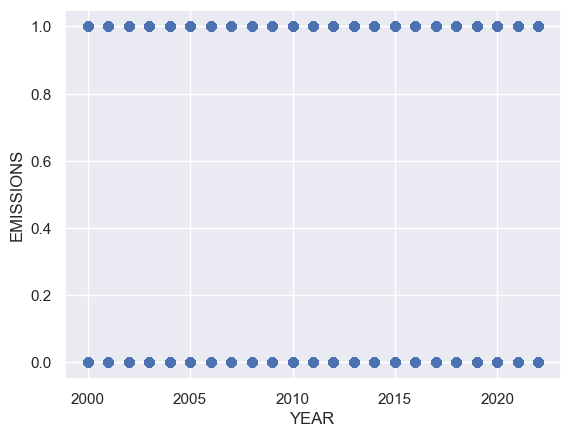

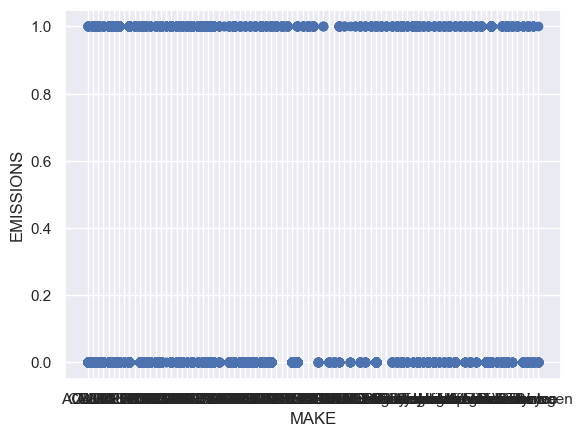

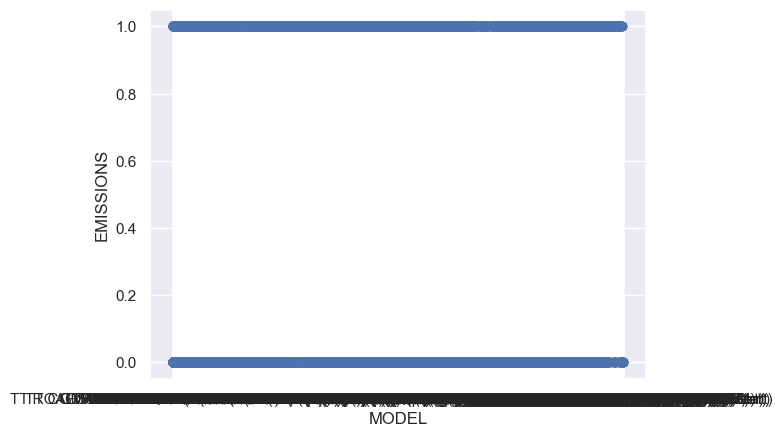

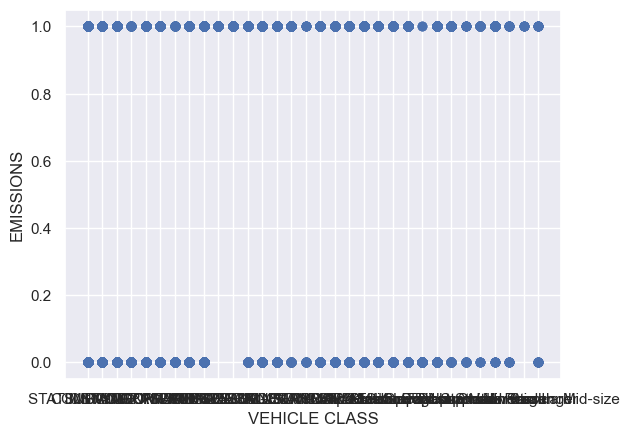

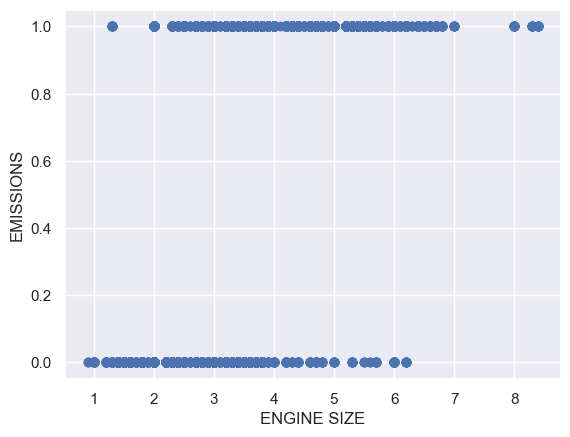

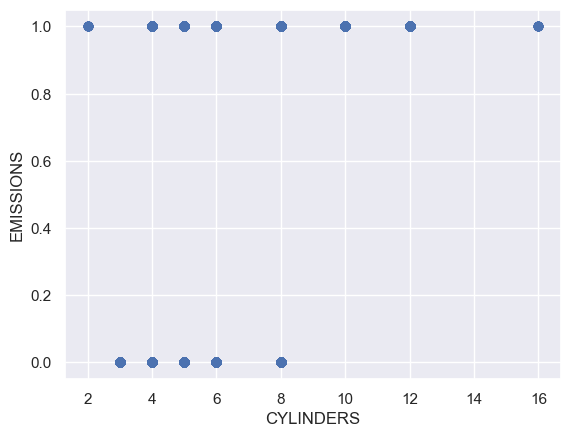

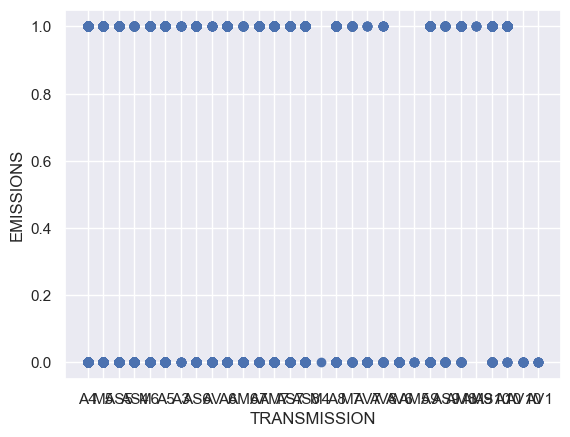

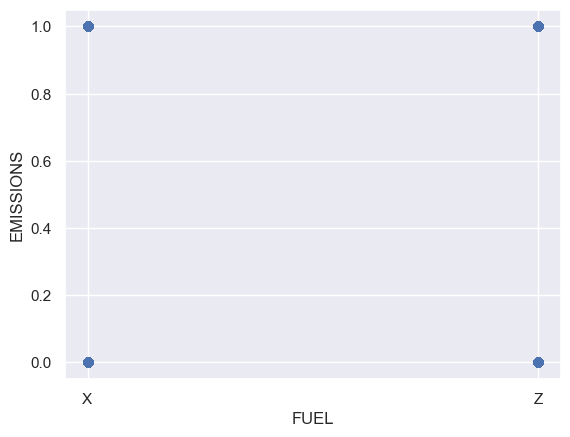

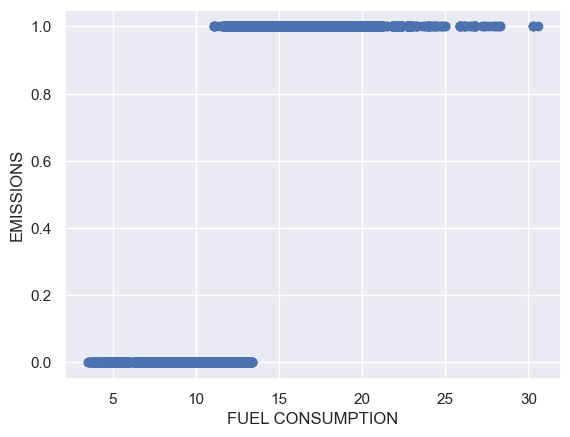

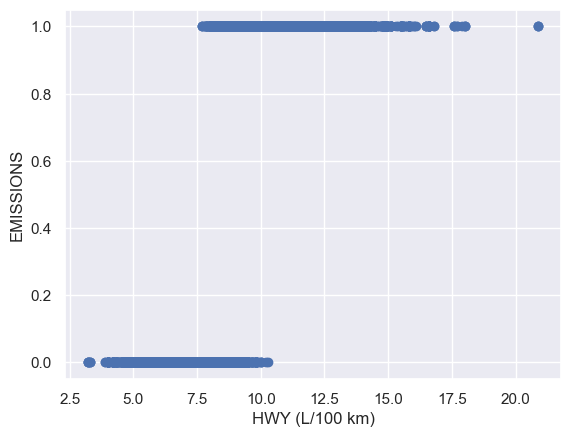

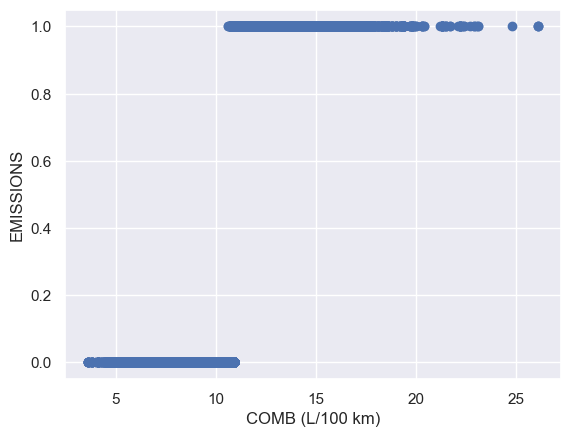

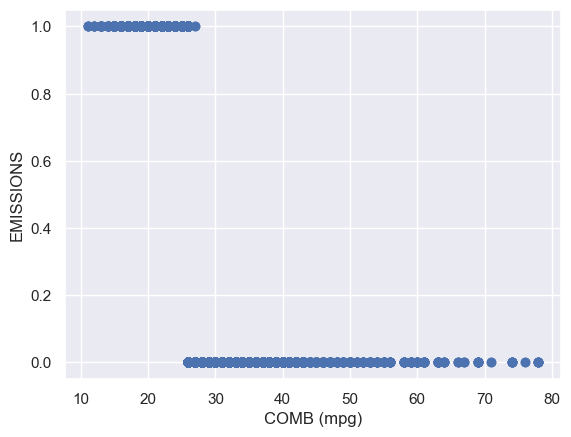

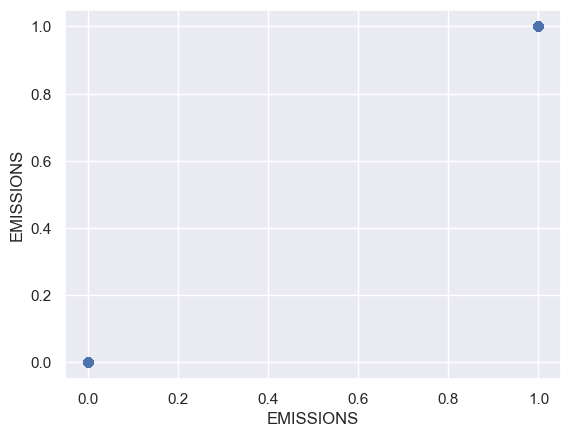

In [124]:
for each in data:
    plt.scatter(data[each],data["EMISSIONS"])
    plt.xlabel(each)
    plt.ylabel("EMISSIONS")
    plt.show()

In [20]:
corr_matrix = data.corr()
corr_matrix

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
YEAR,1.000000,-0.078270,-0.072537,-0.117508,-0.013241,-0.083357,0.096366,-0.006253
ENGINE SIZE,-0.078270,1.000000,0.911428,0.840325,0.764086,0.827921,-0.750735,0.708759
CYLINDERS,-0.072537,0.911428,1.000000,0.828693,0.724226,0.806119,-0.715387,0.676150
FUEL CONSUMPTION,-0.117508,0.840325,0.828693,1.000000,0.927872,0.991448,-0.927030,0.777398
HWY (L/100 km),-0.013241,0.764086,0.724226,0.927872,1.000000,0.968157,-0.889787,0.791575
COMB (L/100 km),-0.083357,0.827921,0.806119,0.991448,0.968157,1.000000,-0.929668,0.795400
COMB (mpg),0.096366,-0.750735,-0.715387,-0.927030,-0.889787,-0.929668,1.000000,-0.724859
EMISSIONS,-0.006253,0.708759,0.676150,0.777398,0.791575,0.795400,-0.724859,1.000000


<Axes: >

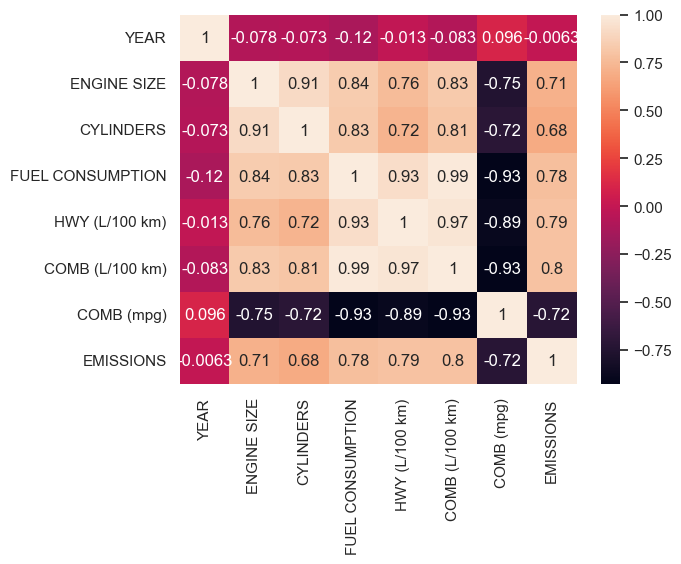

In [21]:
sns.set()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [22]:
corr_matrix["EMISSIONS"].sort_values(ascending=False)

EMISSIONS           1.000000
COMB (L/100 km)     0.795400
HWY (L/100 km)      0.791575
FUEL CONSUMPTION    0.777398
ENGINE SIZE         0.708759
CYLINDERS           0.676150
YEAR               -0.006253
COMB (mpg)         -0.724859
Name: EMISSIONS, dtype: float64

In [14]:
data = data.drop(columns = "YEAR")

In [111]:
q1 = np.percentile(data['FUEL CONSUMPTION'], 25)
q3 = np.percentile(data['FUEL CONSUMPTION'], 75)
iqr = q3 - q1
k = 1.5
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr
outliers_fuel = data[(data['FUEL CONSUMPTION'] < lower_bound) | (data['FUEL CONSUMPTION'] > upper_bound)]

# Remove the outliers from the original dataframe
data = data.drop(outliers_fuel.index)
data

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,0.0,9.2,6.7,8.1,35,0
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,0.0,8.5,6.5,7.6,37,0
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,1.0,12.2,7.4,10.0,28,0
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,1.0,13.4,9.2,11.5,25,1
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,0.0,10.0,7.0,8.6,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,1.0,10.7,7.7,9.4,30,0
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,1.0,10.5,8.1,9.4,30,0
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,1.0,11.0,8.7,9.9,29,0
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,1.0,11.5,8.4,10.1,28,0


In [215]:
encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()
dataset = data
dataset["FUEL"]=ordinal_encoder.fit_transform(dataset[["FUEL"]])
make_enc = ordinal_encoder.fit_transform(dataset[["MAKE"]])
model_enc = ordinal_encoder.fit_transform(dataset[["MODEL"]])
class_enc = ordinal_encoder.fit_transform(dataset[["VEHICLE CLASS"]])
transmission_enc = ordinal_encoder.fit_transform(dataset[["TRANSMISSION"]])


In [113]:
new_data = np.concatenate((make_enc,model_enc,\
                          class_enc,transmission_enc,\
                          np.asarray(dataset.drop\
                                     (columns =["MAKE","MODEL","VEHICLE CLASS",\
                                                "TRANSMISSION", "EMISSIONS","FUEL CONSUMPTION"]))),axis=1)
train_x,test_x,train_y,test_y = train_test_split(new_data,dataset["EMISSIONS"], test_size=0.1, random_state=42)

# Machine learning algorithm

## Logistic Regression Model

In [144]:
clf = LogisticRegression()
clf.fit(train_x ,train_y)
y_pred = clf.predict(test_x)
recal_fore = recall_score(test_y, y_pred, average=None)
print(f"The Acuracy is : {round(accuracy_score(test_y, y_pred)*100,2)} %")
print("Classification report:\n",classification_report(test_y, y_pred))

LogisticRegression()

The Acuracy is : 97.44 %
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1217
           1       0.97      0.97      0.97       856

    accuracy                           0.97      2073
   macro avg       0.97      0.97      0.97      2073
weighted avg       0.97      0.97      0.97      2073



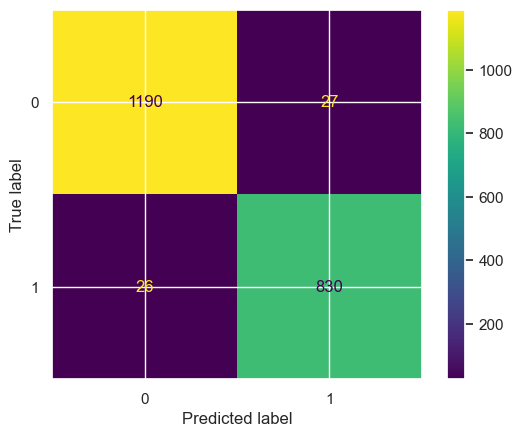

In [145]:
# plot the confusion matrix
cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [204]:
score = cross_val_score(LogisticRegression(), train_x, train_y, cv=10)
print("The average accuracy: ", round(score.mean()*100,2),"%")

The average accuracy:  98.05 %


### Optimize the model with GridSearchCV

In [149]:
# Create logistic regression model
lr_model = LogisticRegression()

# Define hyperparameters to search over
hyperparameters = {
    'penalty': ['l1', 'l2',None],
    'C': [0.01, 0.1, 1, 10, 100,1000]
}

# Use GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(lr_model, hyperparameters, cv=5)
grid_search.fit(train_x, train_y)

# Print best hyperparameters and corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)
y_pred = grid_search.predict(test_x)
recal_fore = recall_score(test_y, y_pred, average=None)
print(f"The Acuracy is : {round(accuracy_score(test_y, y_pred)*100,2)} %")

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', None]})

Best hyperparameters:  {'C': 0.01, 'penalty': None}
Best accuracy score:  0.9868131868131869
The Acuracy is : 98.02 %


### Optimize in the pipeline

Best hyperparameters:  {'classify__C': 10, 'classify__penalty': 'l2', 'select__k': 8}
Best accuracy score:  0.9897078531224872
The Acuracy is : 98.65 %
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1217
           1       0.99      0.98      0.98       856

    accuracy                           0.99      2073
   macro avg       0.99      0.99      0.99      2073
weighted avg       0.99      0.99      0.99      2073



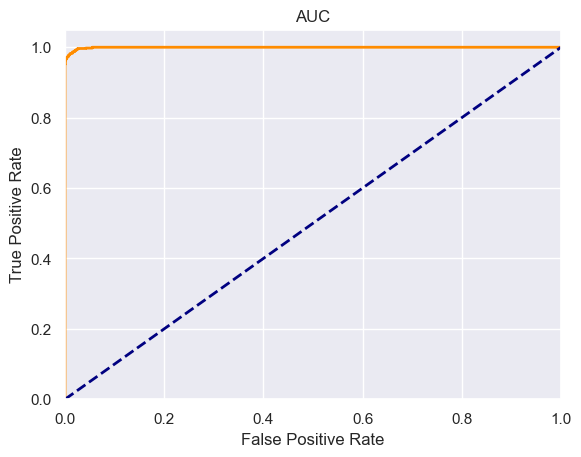

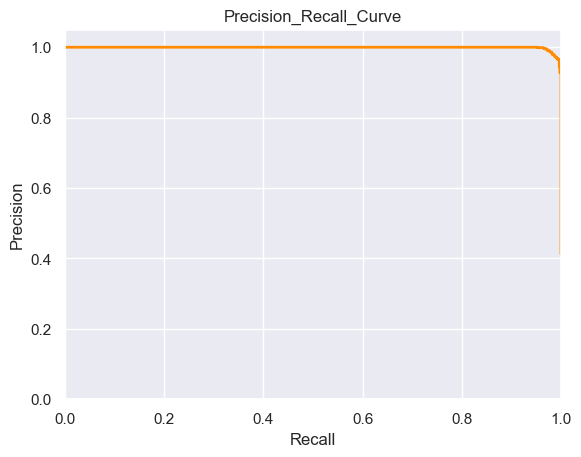

In [214]:

# Create a pipeline
pipeline = Pipeline([
    ('select', SelectKBest(score_func=f_classif)), # Select top features using ANOVA F-value
    ('scale', StandardScaler()), # Standardize the data
    ('classify', LogisticRegression()) # Classifier
])
para = {
    'select__k':[5,8,10],
    'classify__penalty': ['l1', 'l2',None],
    'classify__C': [0.01, 0.1, 1, 10, 100,1000]
}

grid_search = GridSearchCV(pipeline, para, cv=5)
grid_search.fit(train_x, train_y)

# Print best hyperparameters and corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

y_pred = grid_search.predict(test_x)
recal_fore = recall_score(test_y, y_pred, average=None)
print(f"The Acuracy is : {round(accuracy_score(test_y, y_pred)*100,2)} %")
print("Classification report:\n",classification_report(test_y, y_pred))
predict_p =grid_search.predict_proba(test_x)[:,1]
fpr, tpr, thresholds = roc_curve(test_y, predict_p, \
                                     pos_label=1)
precision, recall, thresholds = precision_recall_curve(test_y, predict_p, pos_label=1)

plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('AUC');

plt.figure();
plt.plot(recall, precision, color='darkorange', lw=2);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('Recall');
plt.ylabel('Precision');
plt.title('Precision_Recall_Curve');
plt.show();

## SVM Model

LinearSVC()

The Acuracy is : 97.35 %
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1217
           1       1.00      0.94      0.97       856

    accuracy                           0.97      2073
   macro avg       0.98      0.97      0.97      2073
weighted avg       0.97      0.97      0.97      2073



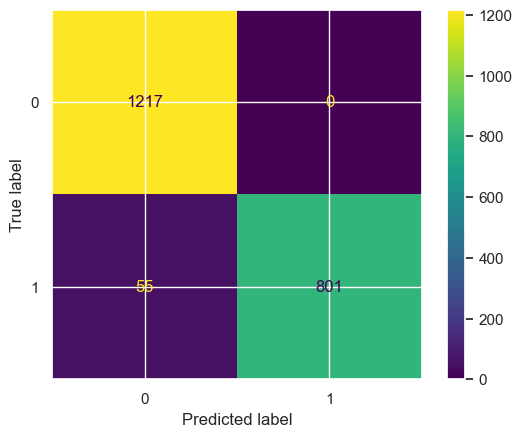

In [205]:
np.random.seed(42)
model_svm = svm.LinearSVC()
model_svm.fit(train_x, train_y)
y_pred_svm = model_svm.predict(test_x)
recal_fore = recall_score(test_y, y_pred_svm, average=None)
print(f"The Acuracy is : {round(accuracy_score(test_y, y_pred_svm)*100,2)} %")
print("Classification report:\n",classification_report(test_y, y_pred_svm))
cm = confusion_matrix(test_y, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Evaluate the quality of the accuracy in the training set

In [157]:
np.random.seed(42)
score = cross_val_score(svm.LinearSVC(), train_x, train_y, cv=10)
print("The average accuracy: ", round(score.mean()*100,2),"%")

The average accuracy:  92.97 %


### Optimizing the SVM model

In [208]:
# np.random.seed(42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'max_iter':[100,500,1000],
    'dual': [True,False]
}

# create the grid search object
grid_search = GridSearchCV(svm.LinearSVC(), param_grid, cv=3)

# perform the grid search
grid_search.fit(train_x, train_y)

# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(test_x)

# evaluate the performance
print(f"The Acuracy is : {round(accuracy_score(test_y, y_pred)*100,2)} %")
print("Classification report:\n", classification_report(test_y, y_pred))

GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'dual': [True, False],
                         'loss': ['hinge', 'squared_hinge'],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2']})

Best hyperparameters: {'C': 1, 'dual': False, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l1'}
Best accuracy score:  0.9867594582520532
The Acuracy is : 97.88 %
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1217
           1       0.98      0.97      0.97       856

    accuracy                           0.98      2073
   macro avg       0.98      0.98      0.98      2073
weighted avg       0.98      0.98      0.98      2073



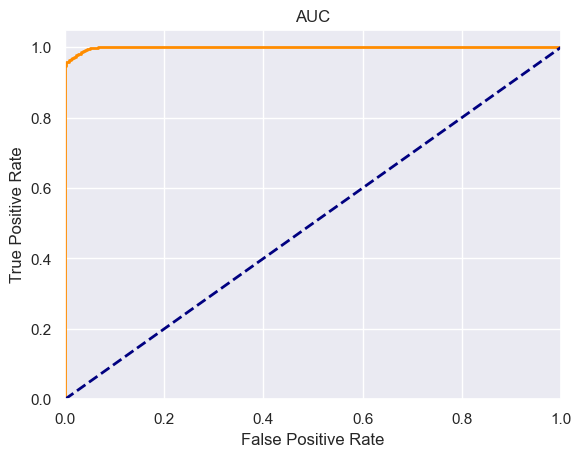

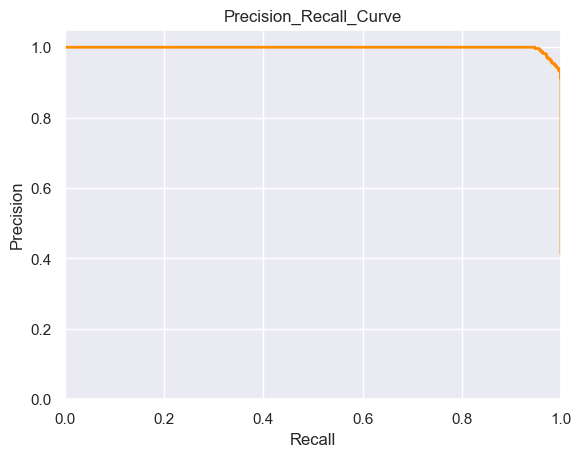

In [159]:
y_pro = best_model.decision_function(test_x)
fpr, tpr, thresholds = roc_curve(test_y, y_pro, \
                                     pos_label=1)
precision, recall, thresholds = precision_recall_curve(test_y, y_pro, pos_label=1)

plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('AUC');

plt.figure();
plt.plot(recall, precision, color='darkorange', lw=2);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('Recall');
plt.ylabel('Precision');
plt.title('Precision_Recall_Curve');
plt.show();

## Random Forset Model

RandomForestClassifier(max_leaf_nodes=5, n_estimators=5, random_state=42)

The Acuracy is : 99.13 %
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1217
           1       0.99      0.99      0.99       856

    accuracy                           0.99      2073
   macro avg       0.99      0.99      0.99      2073
weighted avg       0.99      0.99      0.99      2073



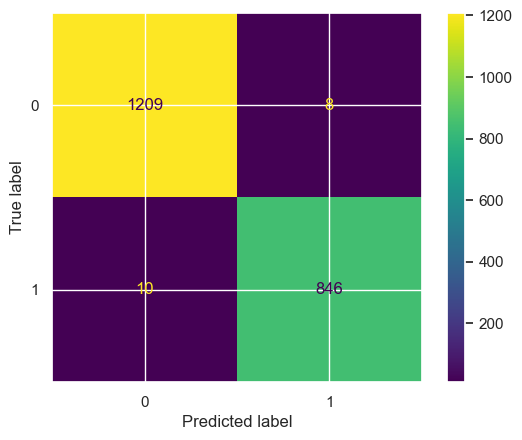

In [207]:
random_for = RandomForestClassifier(n_estimators = 5,max_leaf_nodes = 5,random_state=42)
random_for.fit(train_x, train_y)

output_pred_fore = random_for.predict(test_x)
print(f"The Acuracy is : {round(accuracy_score(test_y, output_pred_fore)*100,2)} %")
print("Classification report:\n", classification_report(test_y, output_pred_fore))

cm = confusion_matrix(test_y, output_pred_fore)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [161]:
score = cross_val_score(RandomForestClassifier(n_estimators = 5,max_leaf_nodes = 5,\
                                               random_state=42), train_x, train_y, cv=10)
print("The average accuracy: ", round(score.mean()*100,2),"%")

The average accuracy:  99.54 %


In [162]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameters to search over
param_dist = {'n_estimators': randint(50, 200),
              'max_depth': [5, 10, 20, None],
              'max_features': ['sqrt', 'log2']}

# Create a Random Forest object
rfc = RandomForestClassifier(random_state=42)

# Perform randomized search to find the best hyperparameters
rand_search = RandomizedSearchCV(estimator=rfc, 
                                 param_distributions=param_dist, 
                                 n_iter=10, 
                                 cv=5, 
                                 random_state=42)
rand_search.fit(train_x, train_y)

# Print the best hyperparameters and the corresponding accuracy
print('Best hyperparameters:', rand_search.best_params_)
print('Best accuracy:', rand_search.best_score_)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [5, 10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fc5f03e77f0>},
                   random_state=42)

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 142}
Best accuracy: 0.9983918520503886


The Acuracy is : 99.86 %
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1217
           1       1.00      1.00      1.00       856

    accuracy                           1.00      2073
   macro avg       1.00      1.00      1.00      2073
weighted avg       1.00      1.00      1.00      2073



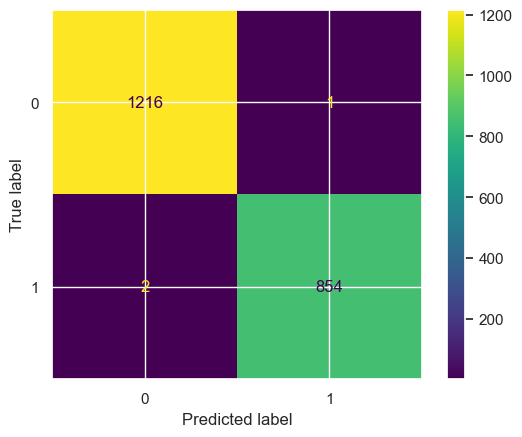

In [163]:
y_hat = rand_search.predict(test_x)
recal_clf = recall_score(test_y, y_hat, average=None)
print(f"The Acuracy is : {round(accuracy_score(test_y, y_hat)*100,2)} %")
print("Classification report:\n", classification_report(test_y, y_hat))
cm = confusion_matrix(test_y, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Neural Network Model

In [168]:
clf = MLPClassifier(random_state=42)
clf = clf.fit(train_x,train_y)
y_hat = clf.predict(test_x)
recal_clf = recall_score(test_y, y_hat, average=None)
print(f"The Acuracy is : {round(accuracy_score(test_y, y_hat)*100,2)} %")
print("Classification report:\n", classification_report(test_y, y_hat))

The Acuracy is : 92.23 %
Classification report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      1217
           1       1.00      0.81      0.90       856

    accuracy                           0.92      2073
   macro avg       0.94      0.91      0.92      2073
weighted avg       0.93      0.92      0.92      2073



In [169]:
score = cross_val_score(MLPClassifier(random_state=42), train_x, train_y, cv=10)
print("The average accuracy: ", round(score.mean()*100,2),"%")

The average accuracy:  94.92 %


In [170]:
param_grid = {
    'hidden_layer_sizes': [(5, 3), (10, 5), (20, 10)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam', 'sgd'],
    'max_iter': [1000, 2000],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

# Create an MLPClassifier object
clf = MLPClassifier(random_state=1)

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(train_x, train_y)

# Get the best model and print the results
best_model = grid_search.best_estimator_
y_hat = best_model.predict(test_x)
recal_clf = recall_score(test_y, y_hat, average=None)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"The Acuracy is : {round(accuracy_score(test_y, y_hat)*100,2)} %")
print("Classification report:\n", classification_report(test_y, y_hat))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['logistic', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(5, 3), (10, 5), (20, 10)],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [1000, 2000], 'solver': ['adam', 'sgd']},
             verbose=1)

Best Parameters: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (20, 10), 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'adam'}
The Acuracy is : 96.43 %
Classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1217
           1       1.00      0.91      0.95       856

    accuracy                           0.96      2073
   macro avg       0.97      0.96      0.96      2073
weighted avg       0.97      0.96      0.96      2073



In [212]:
param_dist = {
    'hidden_layer_sizes': [(5, 3), (10, 5), (20, 10)],
    'activation': ['logistic', 'relu'],
    'solver': ['adam', 'sgd'],
    'max_iter': [1000, 2000],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

# Create an MLPClassifier object
clf = MLPClassifier(random_state=1)

# Create a RandomizedSearchCV object and fit it to the data
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,\
                                   cv=5, verbose=1,random_state=42)
random_search.fit(train_x, train_y)

# Get the best model and print the results
best_model = random_search.best_estimator_
y_hat = best_model.predict(test_x)
recall_clf = recall_score(test_y, y_hat, average=None)
print(f"Best Parameters: {random_search.best_params_}")
print("Best accuracy score: ", grid_search.best_score_)
print(f"The Acuracy is : {round(accuracy_score(test_y, y_hat)*100,2)} %")
print("Classification report:\n", classification_report(test_y, y_hat))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=MLPClassifier(random_state=1),
                   param_distributions={'activation': ['logistic', 'relu'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(5, 3), (10, 5),
                                                               (20, 10)],
                                        'learning_rate_init': [0.001, 0.01],
                                        'max_iter': [1000, 2000],
                                        'solver': ['adam', 'sgd']},
                   random_state=42, verbose=1)

Best Parameters: {'solver': 'adam', 'max_iter': 1000, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (10, 5), 'alpha': 0.01, 'activation': 'logistic'}
Best accuracy score:  0.9867594582520532
The Acuracy is : 97.06 %
Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1217
           1       1.00      0.93      0.96       856

    accuracy                           0.97      2073
   macro avg       0.98      0.96      0.97      2073
weighted avg       0.97      0.97      0.97      2073



## Naive Bayes Model

In [176]:

clf = GaussianNB()
clf.fit(train_x, train_y)
y_hat = clf.predict(test_x)

# Evaluate the accuracy of the model
print(f"The Acuracy is : {round(accuracy_score(test_y, y_hat)*100,2)} %")
print("Classification report:\n", classification_report(test_y, y_hat))


GaussianNB()

The Acuracy is : 95.8 %
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1217
           1       0.95      0.95      0.95       856

    accuracy                           0.96      2073
   macro avg       0.96      0.96      0.96      2073
weighted avg       0.96      0.96      0.96      2073



In [178]:
clf = GaussianNB()

param_grid = {
    'var_smoothing': [0.1, 1, 10, 100]
}

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(train_x, train_y)

# Get the best model and print the results
best_model = grid_search.best_estimator_
y_hat = best_model.predict(test_x)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"The Acuracy is : {round(accuracy_score(test_y, y_hat)*100,2)} %")
print("Classification report:\n", classification_report(test_y, y_hat))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.1, 1, 10, 100]}, verbose=1)

Best Parameters: {'var_smoothing': 0.1}
The Acuracy is : 58.71 %
Classification report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74      1217
           1       0.00      0.00      0.00       856

    accuracy                           0.59      2073
   macro avg       0.29      0.50      0.37      2073
weighted avg       0.34      0.59      0.43      2073



In [213]:
# Define a pipeline to select the best k features and train the model
clf = GaussianNB()
kbest = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('kbest', kbest), ('clf', clf)])

# Define the grid search parameters
param_grid = {
    'kbest__k': [2, 4, 6, 8, 10],
}

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(train_x, train_y)

# Get the best model and print the results
best_model = grid_search.best_estimator_
y_hat = best_model.predict(test_x)
print(f"Best Parameters: {grid_search.best_params_}")
print("Best accuracy score: ", grid_search.best_score_)
print(f"The Acuracy is : {round(accuracy_score(test_y, y_hat)*100,2)} %")
print("Classification report:\n", classification_report(test_y, y_hat))


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kbest', SelectKBest()),
                                       ('clf', GaussianNB())]),
             param_grid={'kbest__k': [2, 4, 6, 8, 10]}, verbose=1)

Best Parameters: {'kbest__k': 4}
Best accuracy score:  0.9692307692307691
The Acuracy is : 96.33 %
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1217
           1       0.96      0.95      0.96       856

    accuracy                           0.96      2073
   macro avg       0.96      0.96      0.96      2073
weighted avg       0.96      0.96      0.96      2073



## Compare the time when training and predict result for each model

In [183]:
import math
import time

In [199]:
def model(xtrain,ytrain,xtest,ytest,model):
    if model == "logistic":
        clf = Pipeline([
    ('select', SelectKBest(score_func=f_classif,k=8)), 
    ('scale', StandardScaler()), 
    ('classify', LogisticRegression(C=10))])
        
    elif model == "svm":
        clf = svm.LinearSVC(C= 1, dual= False, loss= 'squared_hinge',\
                            max_iter= 1000, penalty= 'l1')
    elif model == "random forest":
        clf = RandomForestClassifier(max_depth=20, max_features= 'log2',\
                                     n_estimators= 142,random_state=42)
        
    elif model == "neural network":
        clf = MLPClassifier(activation= 'logistic', alpha= 0.001,\
                            hidden_layer_sizes= (20, 10), learning_rate_init= 0.001,\
                            max_iter= 1000, solver= 'adam',random_state=1)
    elif model == "naive bayes":
        clf = Pipeline([
    ('select', SelectKBest(score_func=f_classif,k=4)), 
    ('classify', GaussianNB())])
        
    clf.fit(xtrain,ytrain)
    y_pred = clf.predict(xtest)  
    accuracy = accuracy_score(ytest, y_pred)
    return accuracy     

In [201]:
model_name = ["logistic","svm","random forest","neural network","naive bayes"]
model_time = [0]*len(model_name)
for i in range(len(model_name)):
    start = time.time()
    model_train = model(train_x,train_y,test_x,test_y,model=model_name[i])
    end = time.time()
    time_count = end-start
    model_time[i]=round(time_count,2)
dict_time = dict(zip(model_name,model_time))
print(dict_time)

{'logistic': 0.05, 'svm': 0.83, 'random forest': 0.73, 'neural network': 1.43, 'naive bayes': 0.01}
